In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
ratings = pd.read_pickle('../data/ml-latest-small/ratings_concat.p')

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [7]:
train, test = train_test_split(ratings, random_state=4444)

In [8]:
print(train.shape)
print(test.shape)

(75636, 4)
(25212, 4)


* predict all scores as 0.5

In [9]:
predictions = [0.5] * len(test)

In [15]:
mse = mean_squared_error(test['rating'], predictions)
rmse = np.sqrt(mse)
rmse

3.1786973884126466

* predict all scores as 5.0

In [19]:
predictions = [5] * len(test)
mse = mean_squared_error(test['rating'], predictions)
rmse = np.sqrt(mse)
rmse

1.8170421225723647

* why perform better when predict all socres as 5

3.5058305568776773
3.5


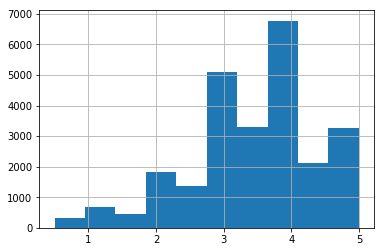

In [26]:
print(test.rating.mean())
print(test.rating.median())
test.rating.hist()

* predict all scores as the mean of all ratings..

In [32]:
predictions = len(test) * [train.rating.mean()]
mse = mean_squared_error(test['rating'], predictions)
rmse = np.sqrt(mse)
rmse

1.0339879957681537

* predict all scores as the mean of ratings by users

In [70]:
sum_of_ratings_by_users = ratings.groupby('userId')

means_of_ratings_by_users = sum_of_ratings_by_users.mean()

means_of_ratings_by_users.rename(columns={'rating':'mean_rating'}, inplace=True)

means_of_ratings_by_users = means_of_ratings_by_users.drop('movieId', axis=1)

In [78]:
means_of_ratings_by_users

,mean_rating
userId,
1,4.366379
2,3.948276
3,2.435897
4,3.555556
5,3.636364
6,3.493631
7,3.230263
8,3.574468
9,3.260870


In [ ]:
merged = pd.merge(test, means_of_ratings_by_users, how='left', on='userId')

In [85]:
merged[merged["userId"]==1]

,userId,movieId,rating,timestamp,mean_rating
388,1,423,3.0,2000-07-30 18:39:23,4.366379
1356,1,2099,4.0,2000-07-30 18:43:08,4.366379
1839,1,356,4.0,2000-07-30 18:16:02,4.366379
1943,1,3793,5.0,2000-07-30 18:30:55,4.366379
4039,1,804,4.0,2000-07-30 18:08:19,4.366379
4138,1,543,4.0,2000-07-30 18:19:39,4.366379
4434,1,1029,5.0,2000-07-30 18:47:35,4.366379
5022,1,1032,5.0,2000-07-30 18:46:31,4.366379
5297,1,2571,5.0,2000-07-30 18:31:28,4.366379
6055,1,2648,4.0,2000-07-30 18:56:54,4.366379


In [88]:
merged['mean_rating'].unique()

array([3.80988024, 3.25058005, 4.08196721, 3.39895636, 2.84737124,
       3.31531532, 3.30156951, 2.84221748, 3.39195701, 3.6573991 ,
       3.69221106, 3.13417569, 3.74390244, 3.49917763, 4.11976048,
       2.78064516, 3.2358841 , 4.203125  , 3.50795334, 2.72413793,
       3.17346939, 3.53267974, 3.78609626, 3.43930636, 3.56590909,
       2.66564103, 3.33978328, 3.4550173 , 3.53869048, 3.3953168 ,
       3.81885856, 4.25      , 3.3755531 , 3.67323481, 4.07964602,
       3.64666667, 3.18604651, 3.1657197 , 4.11363636, 4.20121951,
       3.35511811, 3.71590909, 4.1423221 , 3.7559727 , 3.49130435,
       2.64205004, 4.32258065, 3.26072235, 3.63099631, 3.65333333,
       3.98684211, 2.60739687, 3.31108312, 3.542     , 3.37227723,
       3.9071618 , 4.09307359, 2.66666667, 3.25851996, 3.23373016,
       3.01774691, 4.20779221, 2.75090253, 3.97742664, 3.79807692,
       3.51125896, 4.11634349, 4.35514019, 3.54444444, 3.90816327,
       3.92466765, 3.9787234 , 3.56768559, 3.40659341, 3.97575

In [89]:
mse = mean_squared_error(merged['rating'], merged['mean_rating'])
rmse = np.sqrt(mse)
rmse

0.9295962808419188

* predict all scores as the mean of ratings by movies

In [91]:
sum_of_ratings_by_movies = ratings.groupby('movieId')

means_of_ratings_by_movies = sum_of_ratings_by_movies.mean()

means_of_ratings_by_movies.rename(columns={'rating':'mean_rating'}, inplace=True)

means_of_ratings_by_movies = means_of_ratings_by_movies.drop('userId', axis=1)

In [92]:
means_of_ratings_by_movies

,mean_rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
6,3.946078
7,3.185185
8,2.875000
9,3.125000


In [94]:
merged = pd.merge(test, means_of_ratings_by_movies, how='left', on='movieId')

In [102]:
merged[merged['mean_rating'].isnull()]

,userId,movieId,rating,timestamp,mean_rating


In [95]:
merged['mean_rating'].unique()

array([3.04037267, 2.15      , 4.10606061, ..., 2.53846154, 2.86842105,
       1.7       ])

In [96]:
mse = mean_squared_error(merged['rating'], merged['mean_rating'])
rmse = np.sqrt(mse)
rmse

0.8715007899882313

In [1]:
'git test'

'git test'